Ad Soyad : Mesut Özdemir

Okul Numarası : 2312721053

Github Repo Bağlantısı : https://github.com/ozdemrmesut7735/genetik_optimizasyonu.git

In [57]:
import random
import matplotlib.pyplot as plt
import numpy as np

# Senaryo 3: Nakliye Rotasında Yakıt ve Zaman Dengesi


# GENETİK ALGORİTMA PARAMETRELERİ
POPULATION_SIZE = 50
GENERATIONS = 100
MUTATION_RATE = 0.1
ELITISM_COUNT = 2

# Değişken Sınırları (Boundaries)
BOUNDS = [(40, 100), (2, 10)]

In [58]:
# 1. ADIM: POPÜLASYON OLUŞTURMA
def create_individual():
    """Belirtilen sınırlar içinde rastgele genlere sahip birey oluşturur."""
    individual = []
    for lower, upper in BOUNDS:
        individual.append(random.uniform(lower, upper))
    return individual

def create_population():
    return [create_individual() for _ in range(POPULATION_SIZE)]

In [59]:
# 2. ADIM: UYGUNLUK (FITNESS) FONKSİYONU
def calculate_fitness(individual):
    """
    Senaryo 3 formülüne göre fitness hesaplar ve kısıtları uygular.
    """
    x1 = individual[0] # Hız
    x2 = individual[1] # Kapasite

    # Amaç: Negatif maliyeti maksimize etmek
    y = (-2 * x1) - (3 * x2) + (0.1 * x1 * x2)

    # KISITLARIN UYGULANMASI
    penalty = 0

    # Kısıt 1:
    if (x1 * x2) > 700:
        penalty += 2000

    # Kısıt 2:
    if x1 < 60:
        penalty += 2000

    return y - penalty

In [60]:
# 3. ADIM: SEÇİLİM MEKANİZMASI (Rulet Tekerleği)
def roulette_wheel_selection(population, fitness_scores):
    """
    Rulet Tekerleği Seçimi (Roulette Wheel Selection).
    Fitness değerleri negatif olabildiği için, olasılık hesabı yapılırken
    değerler pozitif bir tabana ötelenir (Normalization).
    """
    # Fitness değerlerini pozitife çevirmek için en küçük değerden çıkarıp ofset ekliyoruz
    min_fitness = min(fitness_scores)
    # Her skoru (score - min_fitness + 0.01) yaparak pozitif yapıyoruz
    adjusted_scores = [(score - min_fitness + 0.01) for score in fitness_scores]

    total_fitness = sum(adjusted_scores)

    # Rulet mantığı: 0 ile toplam fitness arasında rastgele bir nokta seç
    pick = random.uniform(0, total_fitness)
    current = 0

    for i, individual in enumerate(population):
        current += adjusted_scores[i]
        if current > pick:
            return individual

    return population[-1] # Güvenlik için sonuncuyu döndür

In [61]:
#  4. ADIM: ÇAPRAZLAMA VE MUTASYON
def crossover(parent1, parent2):
    """Aritmetik Çaprazlama: Ebeveynlerin genlerinin ağırlıklı ortalaması alınır."""
    child1, child2 = [], []
    alpha = random.uniform(0.3, 0.7) # Rastgele bir karışım oranı

    for i in range(len(parent1)):
        c1 = alpha * parent1[i] + (1 - alpha) * parent2[i]
        c2 = (1 - alpha) * parent1[i] + alpha * parent2[i]
        child1.append(c1)
        child2.append(c2)

    return child1, child2

def mutation(individual):
    """Gaussian Mutasyon: Genin mevcut değerine küçük rastgele sayı ekler."""
    if random.random() < MUTATION_RATE:
        gene_idx = random.randint(0, len(BOUNDS) - 1)
        lower, upper = BOUNDS[gene_idx]

        # Mevcut değere -2 ile +2 arasında rastgele sayı ekle
        change = random.gauss(0, 1)
        new_val = individual[gene_idx] + change

        # Sınır kontrolü (Clamping)
        individual[gene_idx] = max(lower, min(new_val, upper))

In [62]:
#  5 ADIM: GENETİK DÖNGÜ
def genetic_algorithm():
    population = create_population()
    history_best = [] # Grafik için en iyi değerleri tutar

    print(f"{'Nesil':<10} {'Max Fitness':<20} {'x1 (Hız)':<15} {'x2 (Yük)':<15}")
    print("-" * 65)

    for generation in range(GENERATIONS):
        # 1. Her bireyin fitness değerini hesapla
        fitness_scores = [calculate_fitness(ind) for ind in population]

        # 2. En iyiyi bul ve kaydet
        best_fitness = max(fitness_scores)
        best_individual = population[fitness_scores.index(best_fitness)]
        history_best.append(best_fitness)

        # Ekrana periyodik yazdırma
        if generation % 10 == 0 or generation == GENERATIONS - 1:
            print(f"{generation:<10} {best_fitness:.4f}             {best_individual[0]:.4f}          {best_individual[1]:.4f}")

        # 3. Yeni Nesil Oluşturma
        new_generation = []

        # Elitizm: En iyi bireyleri koru
        sorted_pop = [x for _, x in sorted(zip(fitness_scores, population), key=lambda pair: pair[0], reverse=True)]
        new_generation.extend(sorted_pop[:ELITISM_COUNT])

        # Geri kalan popülasyonu Rulet + Crossover ile doldur
        while len(new_generation) < POPULATION_SIZE:
            parent1 = roulette_wheel_selection(population, fitness_scores)
            parent2 = roulette_wheel_selection(population, fitness_scores)

            # Aynı ebeveyn seçildiyse tekrar dene
            if parent1 == parent2:
                parent2 = roulette_wheel_selection(population, fitness_scores)

            child1, child2 = crossover(parent1, parent2)

            mutation(child1)
            mutation(child2)

            new_generation.append(child1)
            if len(new_generation) < POPULATION_SIZE:
                new_generation.append(child2)

        population = new_generation

    return best_individual, history_best

Nesil      Max Fitness          x1 (Hız)        x2 (Yük)       
-----------------------------------------------------------------
0          -95.2752             61.7991          8.9068
10         -93.6013             62.5519          9.6776
20         -91.8932             61.0701          9.7351
30         -90.7763             60.2891          9.8392
40         -90.3121             60.0338          9.9073
50         -90.3121             60.0338          9.9073
60         -90.2564             60.2564          10.0000
70         -90.2564             60.2564          10.0000
80         -90.2564             60.2564          10.0000
90         -90.1672             60.1443          9.9924
99         -90.1672             60.1443          9.9924

OPTİMİZASYON SONUCU
Optimal Hız (x1)      : 60.1443 km/h
Optimal Kapasite (x2) : 9.9924 ton
Amaç Fonksiyonu (y)   : -90.1672
Kısıt Kontrol (x1*x2) : 600.99 (<= 700 olmalı)
Hız Sınırı Kontrol    : 60.14 (>= 60 olmalı)


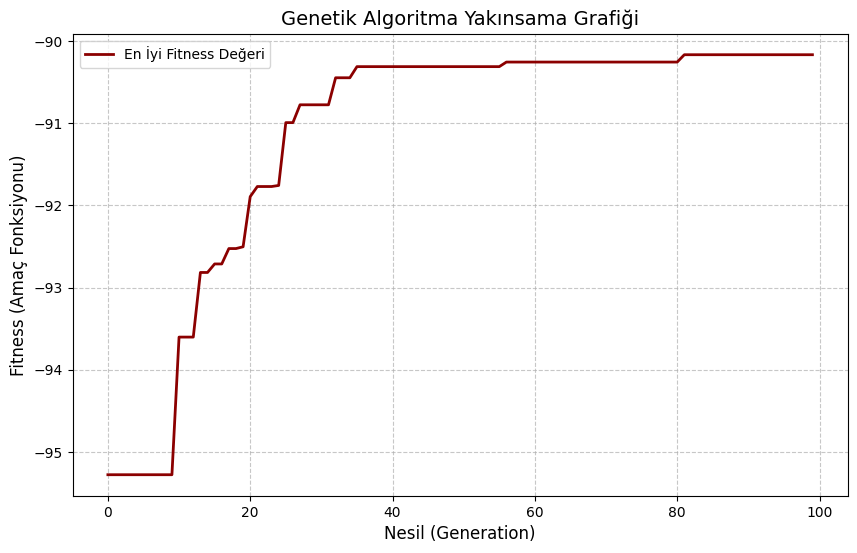

In [63]:
# ÇALIŞTIRMA VE GÖRSELLEŞTİRME
best_sol, history = genetic_algorithm()
final_fitness = calculate_fitness(best_sol)

print("\n" + "="*30)
print("OPTİMİZASYON SONUCU")
print("="*30)
print(f"Optimal Hız (x1)      : {best_sol[0]:.4f} km/h")
print(f"Optimal Kapasite (x2) : {best_sol[1]:.4f} ton")
print(f"Amaç Fonksiyonu (y)   : {final_fitness:.4f}")
print(f"Kısıt Kontrol (x1*x2) : {best_sol[0]*best_sol[1]:.2f} (<= 700 olmalı)")
print(f"Hız Sınırı Kontrol    : {best_sol[0]:.2f} (>= 60 olmalı)")

# Grafik Çizimi
plt.figure(figsize=(10, 6))
plt.plot(history, label='En İyi Fitness Değeri', color='darkred', linewidth=2)
plt.title('Genetik Algoritma Yakınsama Grafiği', fontsize=14)
plt.xlabel('Nesil (Generation)', fontsize=12)
plt.ylabel('Fitness (Amaç Fonksiyonu)', fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()
plt.show()